In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [24]:
odds = pd.read_csv(r"C:\Users\krawc\OneDrive\Documents\code\pythons\predictor\data\match_w_odds_1923.csv", index_col=[0,1,2])
odds

date  \
league             season game                                                        
ENG-Premier League 1920   2019-08-09 Liverpool-Norwich City     2019-08-09 20:00:00   
                          2019-08-10 Bournemouth-Sheffield Utd  2019-08-10 15:00:00   
                          2019-08-10 Burnley-Southampton        2019-08-10 15:00:00   
                          2019-08-10 Crystal Palace-Everton     2019-08-10 15:00:00   
                          2019-08-10 Tottenham-Aston Villa      2019-08-10 17:30:00   
...                                                                             ...   
                   2223   2023-05-28 Everton-Bournemouth        2023-05-28 16:30:00   
                          2023-05-28 Leeds United-Tottenham     2023-05-28 16:30:00   
                          2023-05-28 Leicester City-West Ham    2023-05-28 16:30:00   
                          2023-05-28 Manchester Utd-Fulham      2023-05-28 16:30:00   
                          2023-05-28 Southampton-Liverpool      2023-05-28 16:30:00   

                                                                     home_team  \
league             season game                                                   
ENG-Premier League 1920   2019-08-09 Liverpool-Norwich City          Liverpool   
                          2019-08-10 Bournemouth-Sheffield Utd     Bournemouth   
                          2019-08-10 Burnley-Southampton               Burnley   
                          2019-08-10 Crystal Palace-Everton     Crystal Palace   
                          2019-08-10 Tottenham-Aston Villa           Tottenham   
...                                                                        ...   
                   2223   2023-05-28 Everton-Bournemouth               Everton   
                          2023-05-28 Leeds United-Tottenham       Leeds United   
                          2023-05-28 Leicester City-West Ham    Leicester City   
                          2023-05-28 Manchester Utd-Fulham      Manchester Utd   
                          2023-05-28 Southampton-Liverpool         Southampton   

                                                                    away_team  \
league             season game                                                  
ENG-Premier League 1920   2019-08-09 Liverpool-Norwich City      Norwich City   
                          2019-08-10 Bournemouth-Sheffield Utd  Sheffield Utd   
                          2019-08-10 Burnley-Southampton          Southampton   
                          2019-08-10 Crystal Palace-Everton           Everton   
                          2019-08-10 Tottenham-Aston Villa        Aston Villa   
...                                                                       ...   
                   2223   2023-05-28 Everton-Bournemouth          Bournemouth   
                          2023-05-28 Leeds United-Tottenham         Tottenham   
                          2023-05-28 Leicester City-West Ham         West Ham   
                          2023-05-28 Manchester Utd-Fulham             Fulham   
                          2023-05-28 Southampton-Liverpool          Liverpool   

                                                                FTHG  FTAG  \
league             season game                                               
ENG-Premier League 1920   2019-08-09 Liverpool-Norwich City        4     1   
                          2019-08-10 Bournemouth-Sheffield Utd     1     1   
                          2019-08-10 Burnley-Southampton           3     0   
                          2019-08-10 Crystal Palace-Everton        0     0   
                          2019-08-10 Tottenham-Aston Villa         3     1   
...                                                              ...   ...   
                   2223   2023-05-28 Everton-Bournemouth           1     0   
                          2023-05-28 Leeds United-Tottenham        1     4   
                          2023-05-28 Leicester

In [25]:
def probs_form_odds(row):    
    import shin
    h,d,a=row
    res=shin.calculate_implied_probabilities([h,d,a])
    return res['implied_probabilities']

def apply_probs_form_odds(df,three_cols):
    new_three_cols=['p'+x for x in three_cols]
    df[new_three_cols]=df[three_cols].apply(probs_form_odds,axis=1,result_type='expand')


In [26]:
odds=odds.droplevel([0,1])
odds=odds.join(pd.get_dummies(odds['FTR']).astype(int)).drop('FTR',axis=1)

In [74]:
cols_info=['date', 'home_team', 'away_team', 'FTHG', 'FTAG', 'H','D','A',]
cols_b365=['B365H', 'B365D', 'B365A']
cols_pin=['PSH', 'PSD', 'PSA']
cols_wh=['WHH', 'WHD', 'WHA']
cols_max=['MaxH', 'MaxD', 'MaxA']
cols_avg=['AvgH', 'AvgD', 'AvgA']
cols_sel=cols_info+cols_wh
cols_sel

['date',
 'home_team',
 'away_team',
 'FTHG',
 'FTAG',
 'H',
 'D',
 'A',
 'WHH',
 'WHD',
 'WHA']

In [75]:
odds1=odds[cols_sel]

In [76]:
apply_probs_form_odds(odds1,cols_wh)

C:\Users\krawc\AppData\Local\Temp\ipykernel_10956\1150123835.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_three_cols]=df[three_cols].apply(probs_form_odds,axis=1,result_type='expand')
C:\Users\krawc\AppData\Local\Temp\ipykernel_10956\1150123835.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_three_cols]=df[three_cols].apply(probs_form_odds,axis=1,result_type='expand')
C:\Users\krawc\AppData\Local\Temp\ipykernel_10956\1150123835.py:9: SettingWithCopyWarning: 
A value is trying to be 

In [77]:
odds1

,date,home_team,away_team,FTHG,FTAG,H,D,A,WHH,WHD,WHA,pWHH,pWHD,pWHA
game,,,,,,,,,,,,,,
2019-08-09 Liverpool-Norwich City,2019-08-09 20:00:00,Liverpool,Norwich City,4,1,1,0,0,1.12,8.50,21.00,0.865838,0.100850,0.033312
2019-08-10 Bournemouth-Sheffield Utd,2019-08-10 15:00:00,Bournemouth,Sheffield Utd,1,1,0,1,0,2.00,3.50,3.80,0.481908,0.270184,0.247908
2019-08-10 Burnley-Southampton,2019-08-10 15:00:00,Burnley,Southampton,3,0,1,0,0,2.70,3.20,2.75,0.354620,0.297417,0.347963
2019-08-10 Crystal Palace-Everton,2019-08-10 15:00:00,Crystal Palace,Everton,0,0,0,1,0,3.10,3.30,2.35,0.305880,0.286580,0.407540
2019-08-10 Tottenham-Aston Villa,2019-08-10 17:30:00,Tottenham,Aston Villa,3,1,1,0,0,1.29,5.50,10.00,0.750327,0.164967,0.084706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-28 Everton-Bournemouth,2023-05-28 16:30:00,Everton,Bournemouth,1,0,1,0,0,1.36,4.20,6.50,0.682100,0.199287,0.118612
2023-05-28 Leeds United-Tottenham,2023-05-28 16:30:00,Leeds United,Tottenham,1,4,0,0,1,2.60,3.50,2.20,0.342643,0.246841,0.410516
2023-05-28 Leicester City-West Ham,2023-05-28 16:30:00,Leicester City,West Ham,2,1,1,0,0,1.85,3.60,3.30,0.495275,0.240138,0.264587


In [78]:
# # "Calibration plot ,Reliability diagram
# from sklearn.calibration import CalibrationDisplay
# CalibrationDisplay.from_predictions(odds1['H'], odds1['pPSH'],n_bins=20)

In [79]:
def bin_total(y_prob, n_bins):
    bins = np.linspace(0., 1. + 1e-8, n_bins + 1)

    # In sklearn.calibration.calibration_curve,
    # the last value in the array is always 0.
    binids = np.digitize(y_prob, bins) - 1

    return np.bincount(binids, minlength=len(bins))

inbin=bin_total( odds1.iloc[:,-3], n_bins=20)
inbin

array([  3,  58,  68,  75,  98, 129, 128, 152, 140, 130,  88, 113,  69,
        81,  60,  54,  39,  28,   7,   0,   0], dtype=int64)

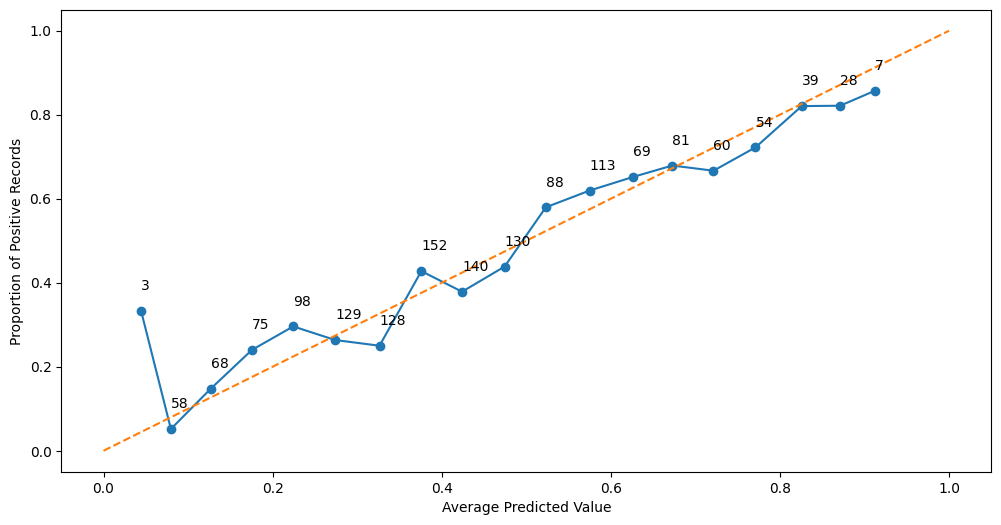

In [80]:
from sklearn.calibration import calibration_curve
fraction_of_positives, mean_predicted_value = calibration_curve(odds1.iloc[:,-9], odds1.iloc[:,-3],n_bins=20)

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(mean_predicted_value, fraction_of_positives, marker='o')
ax.set_xlabel('Average Predicted Value')
ax.set_ylabel('Proportion of Positive Records')
ax.plot([0, 1], [0, 1], linestyle='--');

for i, txt in enumerate(inbin[:-2]):
    ax.annotate(txt, (mean_predicted_value[i], fraction_of_positives[i]+.05))

In [83]:
probs_form_odds([5.65,4.15,1.715])

[0.17670673584590962, 0.24066091075145443, 0.5826884876017923]

In [84]:
probs_form_odds([5.17,4.03,1.69])


[0.1835807355356829, 0.2378219996569998, 0.5785972648077868]

In [85]:
probs_form_odds([5.10, 4.20 , 1.70])


[0.1894155988478267, 0.23119031314563396, 0.5793940880070012]